In [3]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import csv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, poisson
import pandas as pd 
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.DataFrame(np.genfromtxt('AppML_InitialProject_train.csv', names=True, delimiter=','))
variables = data.columns
input_variables = variables[(variables != "p_Truth_isElectron") & (variables != "p_Truth_Energy")]
electron_classification = data["p_Truth_isElectron"]
regression_target = data["p_Truth_Energy"]
input_data = data[input_variables]

In [5]:
feature_scaler = MinMaxScaler()
input_data_scaled = feature_scaler.fit_transform(input_data)
input_train, input_test, truth_train, truth_test = train_test_split(input_data_scaled, electron_classification, test_size=0.15, random_state=42)

In [6]:
# from random import uniform
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score
# import time

# start = time.time()

# # Generate random hidden layer sizes
# def generate_hidden_layer_sizes(n_samples=10):
#     layer_sizes = []
#     for _ in range(n_samples):
#         # Randomly choose number of layers (at least 2 layers)
#         n_layers = np.random.randint(1, 5)  # Randomly select between 2 to 5 layers
#         # Randomly choose the size of each layer (between 10 and 100 nodes)
#         sizes = tuple(np.random.randint(10, 101) for _ in range(n_layers))
#         layer_sizes.append(sizes)
#     return layer_sizes

# random_hidden_layer_sizes = generate_hidden_layer_sizes(20)

# # Define parameters for random search
# parameters_RandomSearch = {
#     'hidden_layer_sizes': random_hidden_layer_sizes,
#     'activation': ['tanh', 'relu'],
#     'solver': ['adam'],
#     'alpha': [0.1],
#     'learning_rate': ['adaptive'],
#     'max_iter': [500],
#     'n_iter_no_change': [10],
#     'learning_rate_init': [0.001, 0.002, 0.005, 0.007, 0.01]
# }

# # Initialize classifier
# clf = MLPClassifier(max_iter=2000, random_state=42, verbose=10)

# # Randomized search
# random_search = RandomizedSearchCV(clf, param_distributions=parameters_RandomSearch, n_iter=10, cv=2, random_state=2, verbose=10)
# random_search.fit(input_train, truth_train)

# # Best model
# best_model = random_search.best_estimator_
# best_params = random_search.best_params_

# # Train best model
# best_model.fit(input_train, truth_train)

# # Predictions and accuracy
# preds = best_model.predict(input_test)
# accuracy = accuracy_score(truth_test, preds)

# end = time.time()

# # Output results
# print("Accuracy with best model: ", accuracy)
# print("Best model: ", best_model)
# print("Best parameters: ", best_params)
# print(f"Time used by MLPClassifier: {(end - start) * 1000:.1f} ms")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START activation=relu, alpha=0.1, hidden_layer_sizes=(65, 78), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500, n_iter_no_change=10, solver=adam
Iteration 1, loss = 0.21550303
Iteration 2, loss = 0.16873899
Iteration 3, loss = 0.15847729
Iteration 4, loss = 0.15403751
Iteration 5, loss = 0.15119769
Iteration 6, loss = 0.14768190
Iteration 7, loss = 0.14844633
Iteration 8, loss = 0.14726119
Iteration 9, loss = 0.14575717
Iteration 10, loss = 0.14651529
Iteration 11, loss = 0.14505995
Iteration 12, loss = 0.14422227
Iteration 13, loss = 0.14611752
Iteration 14, loss = 0.14445030
Iteration 15, loss = 0.14450129
Iteration 16, loss = 0.14198059
Iteration 17, loss = 0.14387533
Iteration 18, loss = 0.14380168
Iteration 19, loss = 0.14310410
Iteration 20, loss = 0.14202231
Iteration 21, loss = 0.14216897
Iteration 22, loss = 0.14149427
Iteration 23, loss = 0.14078047
Iteration 24, loss = 0.14115615
Itera

ValueError: operands could not be broadcast together with shapes (36000,1) (60000,1) 

Feature ranking:
1. Feature 42 (0.02306172839506171)
2. Feature 9 (0.01724691358024692)
3. Feature 10 (0.015395061728395073)
4. Feature 26 (0.014123456790123426)
5. Feature 25 (0.013012345679012327)
6. Feature 27 (0.008765432098765383)
7. Feature 7 (0.00458024691358024)
8. Feature 58 (0.004271604938271574)
9. Feature 44 (0.003333333333333336)
10. Feature 29 (0.00318518518518518)
11. Feature 32 (0.002345679012345651)
12. Feature 19 (0.002172839506172789)
13. Feature 12 (0.001913580246913571)
14. Feature 11 (0.0019012345679012184)
15. Feature 95 (0.0018518518518518452)
16. Feature 36 (0.0014074074074074128)
17. Feature 34 (0.0014074074074074128)
18. Feature 81 (0.0011481481481481204)
19. Feature 45 (0.001049382716049374)
20. Feature 13 (0.0010370370370370214)
21. Feature 71 (0.0009506172839505908)
22. Feature 132 (0.000888888888888865)
23. Feature 49 (0.0008765432098765125)
24. Feature 8 (0.0008641975308641969)
25. Feature 14 (0.0008271604938271393)
26. Feature 46 (0.0008271604938271393)

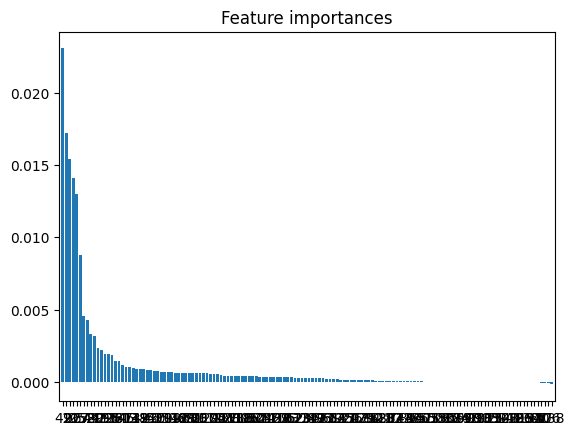

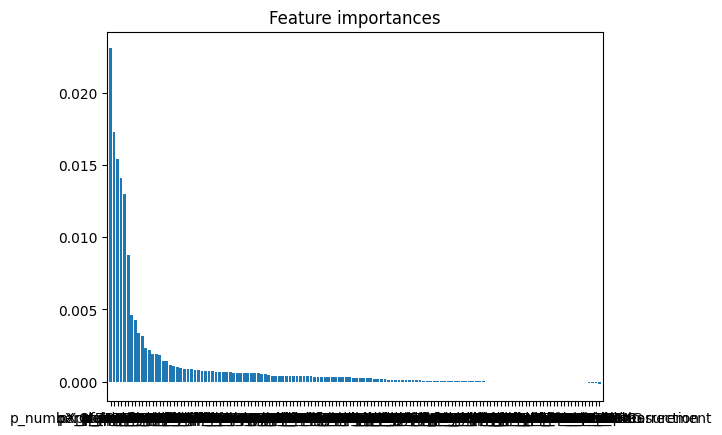

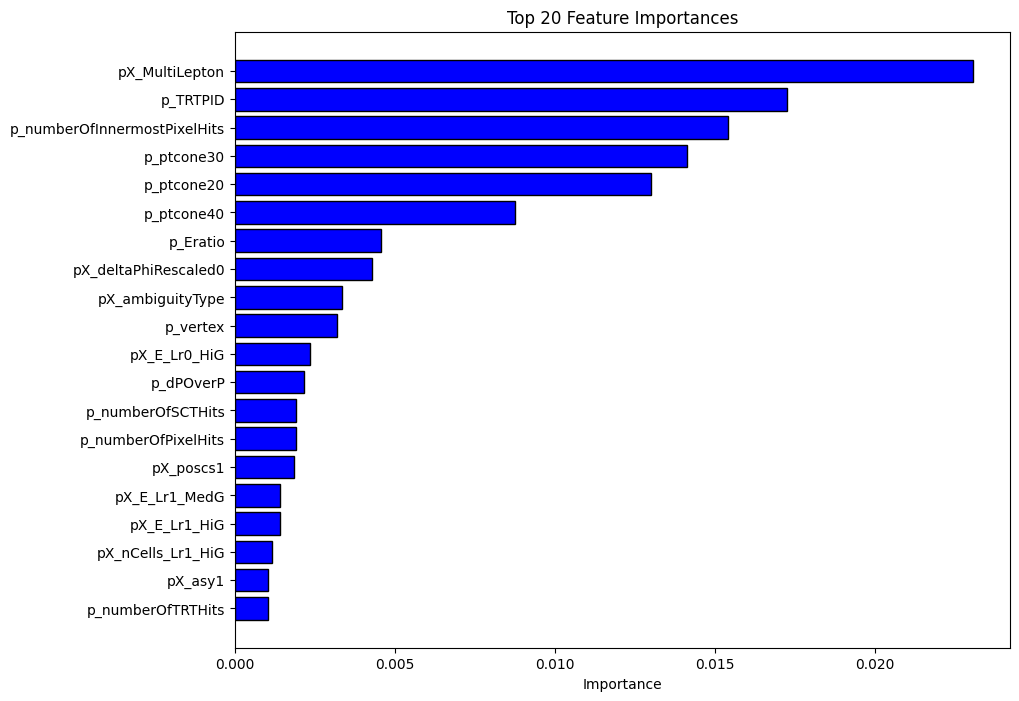

Top 20 feature names for feature importance:
['pX_MultiLepton' 'p_TRTPID' 'p_numberOfInnermostPixelHits' 'p_ptcone30'
 'p_ptcone20' 'p_ptcone40' 'p_Eratio' 'pX_deltaPhiRescaled0'
 'pX_ambiguityType' 'p_vertex' 'pX_E_Lr0_HiG' 'p_dPOverP'
 'p_numberOfSCTHits' 'p_numberOfPixelHits' 'pX_poscs1' 'pX_E_Lr1_MedG'
 'pX_E_Lr1_HiG' 'pX_nCells_Lr1_HiG' 'pX_asy1' 'p_numberOfTRTHits']


In [7]:
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_iris

result = permutation_importance(best_model, input_test, truth_test, n_repeats=3, random_state=42)

# Get importances and indices of the sorted features
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(input_data.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(input_data.shape[1]), importances[indices], align="center")
plt.xticks(range(input_data.shape[1]), indices)
plt.xlim([-1, input_data.shape[1]])
plt.show()


# Assume importances and indices have been calculated as shown in your previous context
plt.figure()
plt.title("Feature importances")
plt.bar(range(input_data.shape[1]), importances[indices], align="center")

# Use column names for x-ticks instead of numeric indices
plt.xticks(range(input_data.shape[1]), [input_variables[i] for i in indices])

plt.xlim([-1, input_data.shape[1]])
plt.show()

# Assuming importances and indices have been calculated as shown in your previous context
top_n = 20  # Number of top features to display

# Get the top N features (assuming indices and importances are already calculated and sorted)
top_indices = indices[:top_n]  # Slice to get top N indices
top_importances = importances[top_indices]  # Corresponding importances
top_feature_names = [input_variables[i] for i in top_indices]  # Feature names for the top features

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(range(top_n), top_importances, align='center', color='blue', edgecolor='black')
plt.yticks(range(top_n), top_feature_names)  # Set feature names as y-ticks
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value on top
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.show()

# Convert the list of top feature names to a numpy array
top_features_array = np.array(top_feature_names)

# Print the top feature names for verification
print("Top 20 feature names for feature importance:")
print(top_features_array)

In [36]:
params  = {'hidden_layer_sizes': [(24,91,79)],
           'activation': ['relu'],
           'solver': ['adam'],
           'alpha': [0.1],
           'learning_rate': ['adaptive'],
           'max_iter': [500],
           'n_iter_no_change': [10],
           'learning_rate_init': [0.001]
           }

grid = GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000, random_state=42, verbose=10),
                param_grid=params, n_jobs=-1)
# print("Best model: ", best_model)
# print("Best parameters: ", best_params)
# print(f"Time used by MLPClassifier: {(end - start) * 1000:.1f} ms")
input_train_20, input_test_20, truth_train, truth_test = train_test_split(input_data_20_scaled, electron_classification, test_size=0.2, random_state=42)
grid.fit(input_train_20, truth_train)

preds = grid.predict(input_test_20)
best_model = grid.best_estimator_
best_params = grid.best_params_


# Assuming truth_test is your true labels
truth_test = np.array(truth_test)
predictions = np.array(preds)
predictions = predictions.reshape(-1, 1)
# Reshape truth_test to match the shape of predictions
truth_test = truth_test.reshape(-1, 1)

# Compute binary cross-entropy loss
loss = tf.keras.losses.binary_crossentropy(truth_test, predictions)

# If you want the mean loss over the validation set
mean_loss = tf.reduce_mean(loss).numpy()

print(f'Binary Cross-Entropy Validation Loss: {mean_loss}')


Iteration 1, loss = 0.22185501
Iteration 1, loss = 0.22099201
Iteration 1, loss = 0.22050646
Iteration 2, loss = 0.16886178
Iteration 2, loss = 0.16985156
Iteration 2, loss = 0.17077598
Iteration 3, loss = 0.16139998
Iteration 3, loss = 0.16203521
Iteration 3, loss = 0.16271479
Iteration 4, loss = 0.15662215
Iteration 4, loss = 0.15739271
Iteration 4, loss = 0.15909599
Iteration 5, loss = 0.15414673
Iteration 5, loss = 0.15590439
Iteration 5, loss = 0.15608897
Iteration 6, loss = 0.15253597
Iteration 6, loss = 0.15487057
Iteration 6, loss = 0.15396118
Iteration 7, loss = 0.15183050
Iteration 7, loss = 0.15277003
Iteration 7, loss = 0.15290439
Iteration 8, loss = 0.14980011
Iteration 8, loss = 0.15189565
Iteration 8, loss = 0.15144387
Iteration 9, loss = 0.14943013
Iteration 9, loss = 0.15091137
Iteration 9, loss = 0.15081266
Iteration 10, loss = 0.14800684
Iteration 10, loss = 0.15007871
Iteration 10, loss = 0.14997780
Iteration 11, loss = 0.14768818
Iteration 11, loss = 0.14918603
Ite

In [8]:
input_data_20 = input_data[top_features_array]
input_data_20_scaled = feature_scaler.fit_transform(input_data_20)

input_train_20, input_test_20, truth_train, truth_test = train_test_split(input_data_20_scaled, electron_classification, test_size=0.2, random_state=42)

In [21]:
test_data = pd.DataFrame(np.genfromtxt('AppML_InitialProject_test_classification.csv', names=True, delimiter=','))

test_input_data = test_data[top_features_array]
test_input_20_scaled = feature_scaler.transform(test_input_data)

In [30]:
from sklearn.neural_network import MLPClassifier

# Correctly specify parameters without redundancy
mlp = MLPClassifier(
    alpha=0.1,
    hidden_layer_sizes=(24, 91, 79),
    learning_rate='adaptive',
    max_iter=80,
    random_state=42,
    verbose=10,
    solver='adam',
    n_iter_no_change=10,
    learning_rate_init=0.001,
    activation='relu'
)

mlp.fit(input_train_20, truth_train)

preds = mlp.predict(input_test_20)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(truth_test, preds)
print(f"Accuracy: {accuracy:.2f}")

# Predictions for the test data
# Assuming model is your trained model and input_test_20 is your validation input

# Assuming truth_test is your true labels
truth_test = np.array(truth_test)
predictions = np.array(preds)
predictions = predictions.reshape(-1, 1)
# Reshape truth_test to match the shape of predictions
truth_test = truth_test.reshape(-1, 1)

# Compute binary cross-entropy loss
loss = tf.keras.losses.binary_crossentropy(truth_test, predictions)

# If you want the mean loss over the validation set
mean_loss = tf.reduce_mean(loss).numpy()

print(f'Binary Cross-Entropy Validation Loss: {mean_loss}')



Iteration 1, loss = 0.20616773
Iteration 2, loss = 0.16275167
Iteration 3, loss = 0.15652656
Iteration 4, loss = 0.15354054
Iteration 5, loss = 0.15157697
Iteration 6, loss = 0.15012308
Iteration 7, loss = 0.14882227
Iteration 8, loss = 0.14765163
Iteration 9, loss = 0.14767167
Iteration 10, loss = 0.14590738
Iteration 11, loss = 0.14607962
Iteration 12, loss = 0.14500961
Iteration 13, loss = 0.14527598
Iteration 14, loss = 0.14392922
Iteration 15, loss = 0.14392591
Iteration 16, loss = 0.14393174
Iteration 17, loss = 0.14438507
Iteration 18, loss = 0.14293269
Iteration 19, loss = 0.14341155
Iteration 20, loss = 0.14307261
Iteration 21, loss = 0.14236859
Iteration 22, loss = 0.14255319
Iteration 23, loss = 0.14201619
Iteration 24, loss = 0.14151723
Iteration 25, loss = 0.14172989
Iteration 26, loss = 0.14166186
Iteration 27, loss = 0.14112947
Iteration 28, loss = 0.14094606
Iteration 29, loss = 0.14131676
Iteration 30, loss = 0.14046961
Iteration 31, loss = 0.14042403
Iteration 32, los

In [37]:
weights = mlp.coefs_
biases = mlp.intercepts_

# Display the number of parameters in each layer
for i, (weight, bias) in enumerate(zip(weights, biases)):
    print(f'Layer {i+1} weights shape: {weight.shape}, biases shape: {bias.shape}')
    num_params = weight.size + bias.size
    print(f'Layer {i+1} total parameters: {num_params}')

# Calculate the total number of parameters in the model
total_params = sum(weight.size + bias.size for weight, bias in zip(weights, biases))
print(f'Total number of parameters in the model: {total_params}')

Layer 1 weights shape: (20, 24), biases shape: (24,)
Layer 1 total parameters: 504
Layer 2 weights shape: (24, 91), biases shape: (91,)
Layer 2 total parameters: 2275
Layer 3 weights shape: (91, 79), biases shape: (79,)
Layer 3 total parameters: 7268
Layer 4 weights shape: (79, 1), biases shape: (1,)
Layer 4 total parameters: 80
Total number of parameters in the model: 10127


In [34]:
# mlp.fit(input_data_20_scaled, electron_classification)

test_predictions = mlp.predict_proba(test_input_20_scaled)

positive_class_proba = test_predictions[:, 1]
df = pd.DataFrame(positive_class_proba, columns=['Probability'])

df.to_csv('Classification_TheodoreBeevers_MLPClassifier_RandomSearchCV.csv', index=True, header=False)

variables = pd.DataFrame(top_features_array, columns=['Variable'])
variables.to_csv('Classification_TheodoreBeevers_MLPClassifier_RandomSearchCV_VariableList.csv',index=False, header=False)

[[1.31810011e-02 9.86818999e-01]
 [3.28992075e-01 6.71007925e-01]
 [9.35201469e-01 6.47985307e-02]
 ...
 [9.77798138e-01 2.22018615e-02]
 [9.99491375e-01 5.08625269e-04]
 [9.96846676e-01 3.15332396e-03]]


Binary Cross-Entropy Validation Loss: 0.7369552465879021


Iteration 1, loss = 0.19863700
Iteration 2, loss = 0.16128796
Iteration 3, loss = 0.15565164
Iteration 4, loss = 0.15221208
Iteration 5, loss = 0.15068670
Iteration 6, loss = 0.14968668
Iteration 7, loss = 0.14874170
Iteration 8, loss = 0.14740117
Iteration 9, loss = 0.14750924
Iteration 10, loss = 0.14582231
Iteration 11, loss = 0.14565479
Iteration 12, loss = 0.14472329
Iteration 13, loss = 0.14520969
Iteration 14, loss = 0.14385220
Iteration 15, loss = 0.14409816
Iteration 16, loss = 0.14290339
Iteration 17, loss = 0.14322827
Iteration 18, loss = 0.14282024
Iteration 19, loss = 0.14228168
Iteration 20, loss = 0.14237832
Iteration 21, loss = 0.14184434
Iteration 22, loss = 0.14167655
Iteration 23, loss = 0.14109971
Iteration 24, loss = 0.14117979
Iteration 25, loss = 0.14055792
Iteration 26, loss = 0.14026426
Iteration 27, loss = 0.13998932
Iteration 28, loss = 0.14018283
Iteration 29, loss = 0.14031175
Iteration 30, loss = 0.13964326
Iteration 31, loss = 0.13956114
Iteration 32, los

/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
4500/4500 - 8s - 2ms/step - accuracy: 0.9317 - loss: 0.1819 - val_accuracy: 0.9426 - val_loss: 0.1579
Epoch 2/500
4500/4500 - 5s - 1ms/step - accuracy: 0.9423 - loss: 0.1537 - val_accuracy: 0.9441 - val_loss: 0.1517
Epoch 3/500
4500/4500 - 5s - 1ms/step - accuracy: 0.9436 - loss: 0.1490 - val_accuracy: 0.9448 - val_loss: 0.1485
Epoch 4/500
4500/4500 - 5s - 1ms/step - accuracy: 0.9448 - loss: 0.1459 - val_accuracy: 0.9459 - val_loss: 0.1458
Epoch 5/500
4500/4500 - 8s - 2ms/step - accuracy: 0.9458 - loss: 0.1432 - val_accuracy: 0.9465 - val_loss: 0.1435
Epoch 6/500
4500/4500 - 6s - 1ms/step - accuracy: 0.9468 - loss: 0.1408 - val_accuracy: 0.9471 - val_loss: 0.1414
Epoch 7/500
4500/4500 - 5s - 1ms/step - accuracy: 0.9477 - loss: 0.1387 - val_accuracy: 0.9475 - val_loss: 0.1395
Epoch 8/500
4500/4500 - 5s - 1ms/step - accuracy: 0.9486 - loss: 0.1369 - val_accuracy: 0.9481 - val_loss: 0.1378
Epoch 9/500
4500/4500 - 6s - 1ms/step - accuracy: 0.9490 - loss: 0.1353 - val_accuracy: 

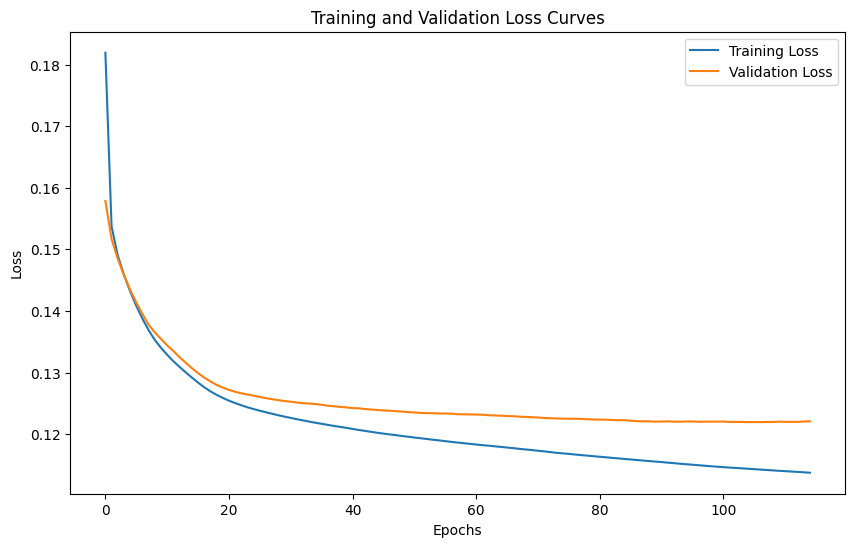

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Assuming input_train, input_test, truth_train, and truth_test are already defined

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)
# [CV 1/2; 1/15] END activation=tanh, alpha=0.1, hidden_layer_sizes=(71, 49, 94, 89), learning_rate=adaptive, 
# learning_rate_init=0.001, max_iter=500, n_iter_no_change=20, solver=adam;, score=0.955 total time= 3.0min
# Define the model
model = Sequential([
    Dense(70, activation='relu', input_shape=(input_train_20.shape[1],)),
    Dense(55, activation='tanh'),
    Dense(90, activation='tanh'),
    Dense(70, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Define the optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation using the test set as validation data
history = model.fit(input_train_20, truth_train, epochs=500, validation_data=(input_test_20, truth_test), callbacks=[early_stopping], verbose=2)

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()



In [12]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(input_test_20, truth_test, verbose=2)
print(f"Test Accuracy: {test_accuracy}")

1125/1125 - 1s - 812us/step - accuracy: 0.9538 - loss: 0.1220
Test Accuracy: 0.9538055658340454


In [15]:


# Assuming model is your trained model and input_test_20 is your validation input
predictions = model.predict(input_test_20)

# Assuming truth_test is your true labels
truth_test = np.array(truth_test)

# Reshape truth_test to match the shape of predictions
truth_test = truth_test.reshape(-1, 1)

# Compute binary cross-entropy loss
loss = tf.keras.losses.binary_crossentropy(truth_test, predictions)

# If you want the mean loss over the validation set
mean_loss = tf.reduce_mean(loss).numpy()

print(f'Binary Cross-Entropy Validation Loss: {mean_loss}')


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Binary Cross-Entropy Validation Loss: 0.12195092439651489


In [16]:
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1

print(f"Epoch with best weights: {best_epoch}")

Epoch with best weights: 105


In [17]:
#train final model on all data

model = Sequential([
    Dense(70, activation='relu', input_shape=(input_data_20_scaled.shape[1],)),
    Dense(55, activation='tanh'),
    Dense(90, activation='tanh'),
    Dense(70, activation='tanh'),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with all data

model.fit(input_data_20_scaled, electron_classification, epochs=best_epoch, verbose=2)


/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/105
5625/5625 - 8s - 1ms/step - accuracy: 0.9423 - loss: 0.1550
Epoch 2/105
5625/5625 - 6s - 999us/step - accuracy: 0.9482 - loss: 0.1377
Epoch 3/105
5625/5625 - 6s - 1ms/step - accuracy: 0.9501 - loss: 0.1334
Epoch 4/105
5625/5625 - 6s - 1ms/step - accuracy: 0.9508 - loss: 0.1309
Epoch 5/105
5625/5625 - 5s - 929us/step - accuracy: 0.9512 - loss: 0.1291
Epoch 6/105
5625/5625 - 5s - 930us/step - accuracy: 0.9516 - loss: 0.1276
Epoch 7/105
5625/5625 - 5s - 953us/step - accuracy: 0.9522 - loss: 0.1263
Epoch 8/105
5625/5625 - 5s - 940us/step - accuracy: 0.9525 - loss: 0.1253
Epoch 9/105
5625/5625 - 5s - 921us/step - accuracy: 0.9527 - loss: 0.1244
Epoch 10/105
5625/5625 - 5s - 919us/step - accuracy: 0.9533 - loss: 0.1235
Epoch 11/105
5625/5625 - 6s - 985us/step - accuracy: 0.9534 - loss: 0.1229
Epoch 12/105
5625/5625 - 5s - 945us/step - accuracy: 0.9536 - loss: 0.1224
Epoch 13/105
5625/5625 - 5s - 916us/step - accuracy: 0.9538 - loss: 0.1220
Epoch 14/105
5625/5625 - 5s - 972us/step

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 70)             │         1,470 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 55)             │         3,905 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 90)             │         5,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 70)             │         6,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,570 (197.54 KB)

 Trainable params: 16,856 (65.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,714 (131.70 KB)

In [18]:
test_data = pd.DataFrame(np.genfromtxt('AppML_InitialProject_test_classification.csv', names=True, delimiter=','))

test_input_data = test_data[top_features_array]
test_input_20_scaled = feature_scaler.transform(test_input_data)

preds = model.predict(test_input_20_scaled)

df = pd.DataFrame(preds, columns=['Probability'])
df.to_csv('Classification_TheodoreBeevers_NN-TensorFlow1.csv', index=True, header=False)

variables = pd.DataFrame(top_features_array, columns=['Variable'])
variables.to_csv('Classification_TheodoreBeevers_NN-TensorFlow1_VariableList.csv',index=False, header=False)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step
